<a href="https://colab.research.google.com/github/rahulvenkat207/Linear-Algebra-CodingWay/blob/main/Eigenvalues%20and%20Eigenvector/EigenValuesVectors_Notebook3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

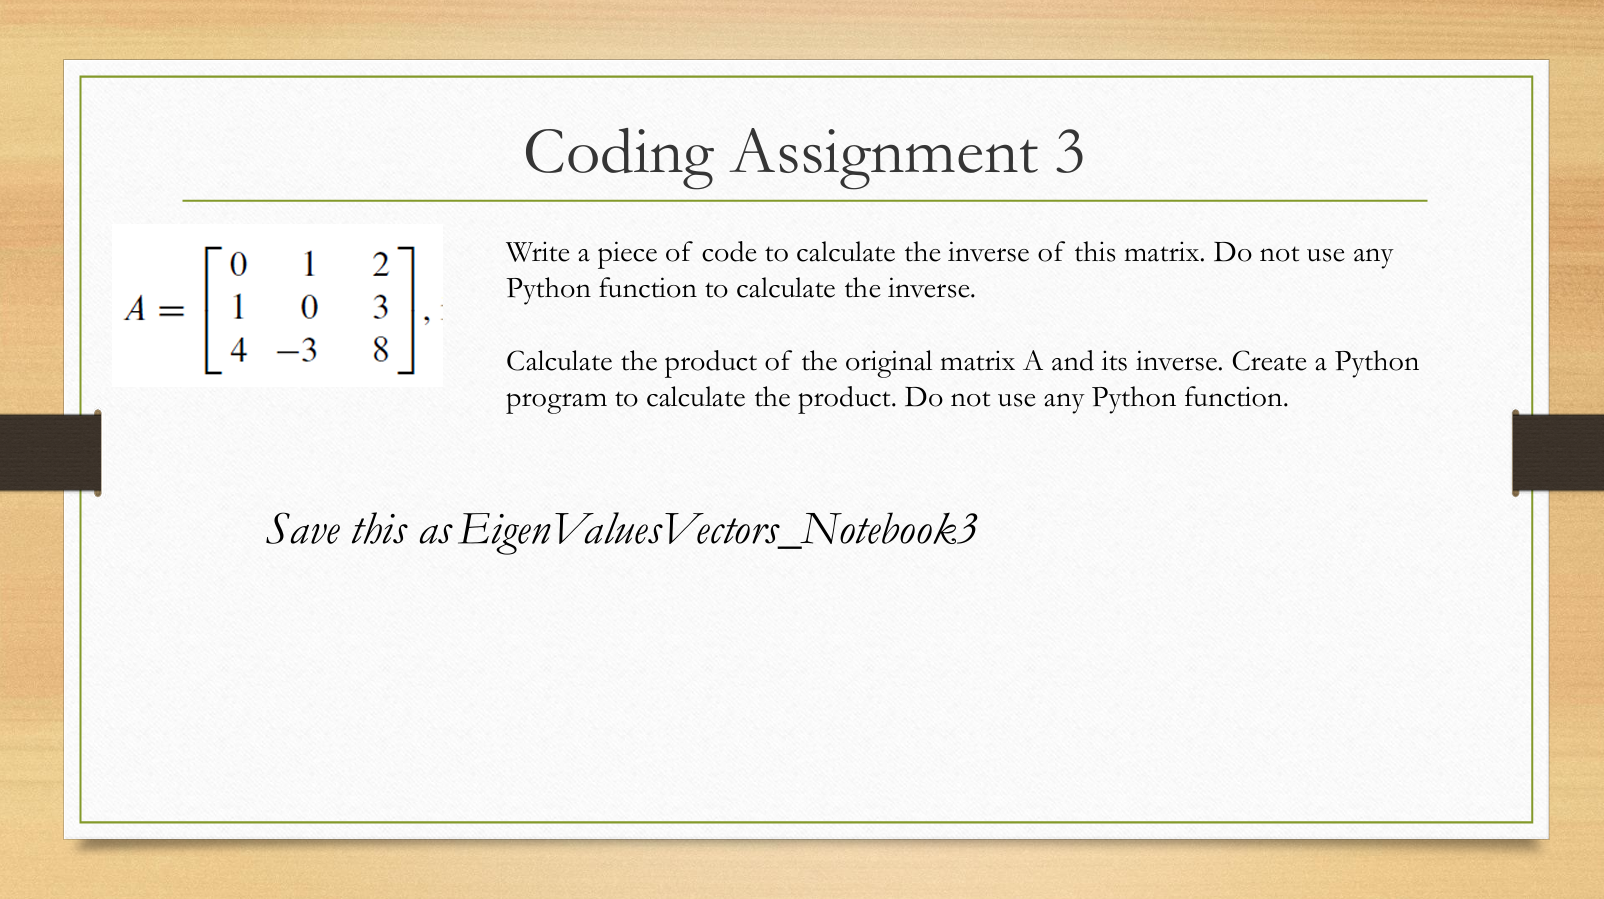

In [33]:
from IPython.display import Image
Image(filename = '/content/Screenshot 2024-04-23 124621.png')


In [34]:
import numpy as np

# Matirx multiplication

In [35]:
def matrix_mul(matrix1, matrix2):
    result = []
    for i in range(len(matrix1)):
        row = []
        for j in range(len(matrix2[0])):
            # Calculate dot product of row i from matrix1 and column j from matrix2
            dot_product = sum(matrix1[i][k] * matrix2[k][j] for k in range(len(matrix2)))
            row.append(dot_product)
        result.append(row)
    return result

# Calculate inverse of matrix

In [36]:
def inverse_matrix(matrix):
    n = len(matrix)

    augmented_matrix = np.hstack([matrix, np.eye(n)])

    for i in range(n):
        pivot = augmented_matrix[i, i]
        if pivot == 0:
            # If the pivot is 0, swap with a row below to avoid division by 0
            for j in range(i+1, n):
                if augmented_matrix[j, i] != 0:
                    augmented_matrix[[i, j]] = augmented_matrix[[j, i]]
                    break
            pivot = augmented_matrix[i, i]
            if pivot == 0:
                raise ValueError("Matrix is singular and cannot be inverted.")
        augmented_matrix[i] /= pivot
        for j in range(n):
            if i != j:
                factor = augmented_matrix[j, i]
                augmented_matrix[j] -= factor * augmented_matrix[i]

    inverse = augmented_matrix[:, n:]

    return inverse

## Define the input matrix

In [38]:
matrix = np.array([
    [0, 1, 2],
    [1, 0, 3],
    [4, -3, 8]
])
print(matrix)

[[ 0  1  2]
 [ 1  0  3]
 [ 4 -3  8]]


In [39]:
inverse = inverse_matrix(matrix)

# Print the RREF (inverse) matrix
print("inverse of this matrix:")
print(inverse)
print()

# Verify A * A_inverse = I
product = matrix_mul(matrix, inverse)
print("product of the original matrix A and its inverse:")
for row in product:
    print(row)

inverse of this matrix:
[[-4.5  7.  -1.5]
 [-2.   4.  -1. ]
 [ 1.5 -2.   0.5]]

product of the original matrix A and its inverse:
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.0, 0.0, 1.0]
